# Import

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## Overview

In [126]:
data = pd.read_csv("laptop_price_clean.csv")

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Price_euros  1302 non-null   float64
 6   Screen       1302 non-null   object 
 7   IPS Screen   1302 non-null   object 
 8   Screen PPI   1302 non-null   float64
 9   Cpu_brand    1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  Gpu brand    1302 non-null   object 
 13  os           1302 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 142.5+ KB


In [130]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Screen,IPS Screen,Screen PPI,Cpu_brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,1339.69,NormalScreen,Yes,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,898.94,NormalScreen,No,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,575.00,NormalScreen,No,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,2537.45,NormalScreen,Yes,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1803.60,NormalScreen,Yes,226.983005,Intel Core i5,0,256,Intel,Mac


In [132]:
data.shape

(1302, 14)

In [134]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = data[data.duplicated()].sort_values(by=['Company', 'TypeName','Ram','OpSys','Weight'])

print("Trùng lặp dòng:")
print(duplicate_rows)

# Kiểm tra số lượng dòng trùng lặp
print("\nSố lượng dòng trùng lặp:")
print(duplicate_rows.shape[0])

Trùng lặp dòng:
     Company            TypeName  Ram       OpSys  Weight  Price_euros  \
1276    Acer            Notebook    4       Linux    2.40       289.00   
1290    Acer            Notebook    4       Linux    2.40       289.00   
1273    Asus            Notebook    4  Windows 10    2.20       369.00   
1282    Asus            Notebook    4  Windows 10    2.20       720.32   
1287    Asus            Notebook    4  Windows 10    2.20       369.00   
1296    Asus            Notebook    4  Windows 10    2.20       720.32   
1301    Asus            Notebook    4  Windows 10    2.20       369.00   
1274    Asus           Ultrabook    8  Windows 10    1.20       729.00   
1288    Asus           Ultrabook    8  Windows 10    1.20       729.00   
1277    Dell            Notebook    2  Windows 10    2.20       379.00   
1291    Dell            Notebook    2  Windows 10    2.20       379.00   
1275    Dell            Notebook    6  Windows 10    2.30       459.00   
1289    Dell          

In [136]:
#Xử lý trùng lặp dòng
data = data.drop_duplicates()
data.shape

(1273, 14)

In [138]:
#Kiểm tra dữ liệu bị miss
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [140]:
data.describe(include='all')

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Screen,IPS Screen,Screen PPI,Cpu_brand,HDD,SSD,Gpu brand,os
count,1273,1273,1273.000000,1273,1273.000000,1273.000000,1273,1273,1273.000000,1273,1273.000000,1273.000000,1273,1273
unique,19,6,NaN,9,NaN,NaN,2,2,NaN,5,NaN,NaN,3,3
top,Dell,Notebook,NaN,Windows 10,NaN,NaN,NormalScreen,No,NaN,Intel Core i7,NaN,NaN,Intel,Windows
freq,291,706,NaN,1047,NaN,NaN,1086,917,NaN,515,NaN,NaN,703,1100
mean,NaN,NaN,8.447761,NaN,2.041100,1135.944658,NaN,NaN,146.950812,NaN,413.715632,186.252946,NaN,NaN
std,NaN,NaN,5.098771,NaN,0.669241,700.846535,NaN,NaN,42.926775,NaN,518.054486,186.531571,NaN,NaN
min,NaN,NaN,2.000000,NaN,0.690000,174.000000,NaN,NaN,90.583402,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,1.500000,609.000000,NaN,NaN,127.335675,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,8.000000,NaN,2.040000,989.000000,NaN,NaN,141.211998,NaN,0.000000,256.000000,NaN,NaN
75%,NaN,NaN,8.000000,NaN,2.310000,1498.000000,NaN,NaN,157.350512,NaN,1000.000000,256.000000,NaN,NaN


In [142]:
#Đổi tên các feature
# Đổi dấu cách thành dấu gạch dưới trong tên cột của data
data.columns = data.columns.str.replace(' ', '_')

# Kiểm tra kết quả
print(data.columns)

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price_euros',
       'Screen', 'IPS_Screen', 'Screen_PPI', 'Cpu_brand', 'HDD', 'SSD',
       'Gpu_brand', 'os'],
      dtype='object')


## Biến liên tục

In [145]:
#Lọc ra các feature có dạng biến liên tục
numerical_features_check = data.select_dtypes(include=[np.number]).columns
numerical_features_check

Index(['Ram', 'Weight', 'Price_euros', 'Screen_PPI', 'HDD', 'SSD'], dtype='object')

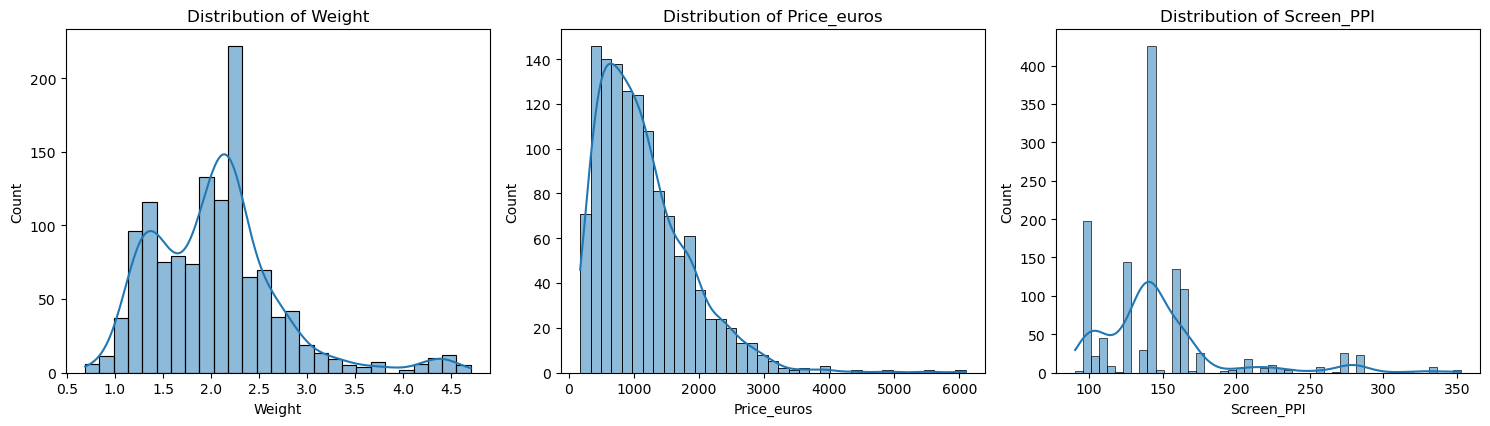

In [147]:
#Phân phối của từng biến liên tục

#Danh sách các biến thật sự là biến liên tục
numerical_features = ['Weight', 'Price_euros', 'Screen_PPI']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [148]:
#Đếm số giá trị = 0 trong các cột thuộc numerical_features
zero_counts = (data[numerical_features] == 0).sum()
print(zero_counts[zero_counts > 0])

Series([], dtype: int64)


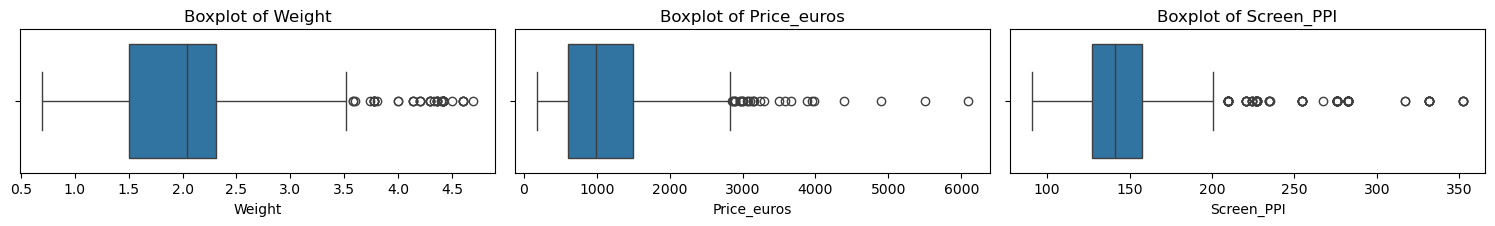

In [149]:
#Phân phối và outliers của features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [153]:
#Đếm số lượng outliers (nếu có)
def calculate_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Xác định outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    #Tính tỷ lệ outliers
    outlier_ratio = num_outliers / len(df) * 100

    return num_outliers, outlier_ratio

#Tính số lượng và tỷ lệ outliers cho các cột numerical
outlier_counts = {
    variable: calculate_outliers(data, variable) for variable in numerical_features
}

#Hiển thị kết quả
for variable, (num_outliers, outlier_ratio) in outlier_counts.items():
    print(f"{variable}: {num_outliers} outliers ({outlier_ratio:.2f}%)")

# Cả 3 feature 'Weight', 'Price_euros', 'Screen_PPI' đều có outliers, trong đó tỉ lệ outlier của Screen_PPI cao (8.88%)
# Tiếp tục xem mối tương quan của các feature này với target ở boxplot để quyết định có xử lý outliers hay không

Weight: 45 outliers (3.53%)
Price_euros: 28 outliers (2.20%)
Screen_PPI: 113 outliers (8.88%)


## Biến phân loại

In [156]:
#Lọc ra các feature có dạng biến phân loại
categorical_features_check = data.select_dtypes(include=['object']).columns
categorical_features_check

Index(['Company', 'TypeName', 'OpSys', 'Screen', 'IPS_Screen', 'Cpu_brand',
       'Gpu_brand', 'os'],
      dtype='object')

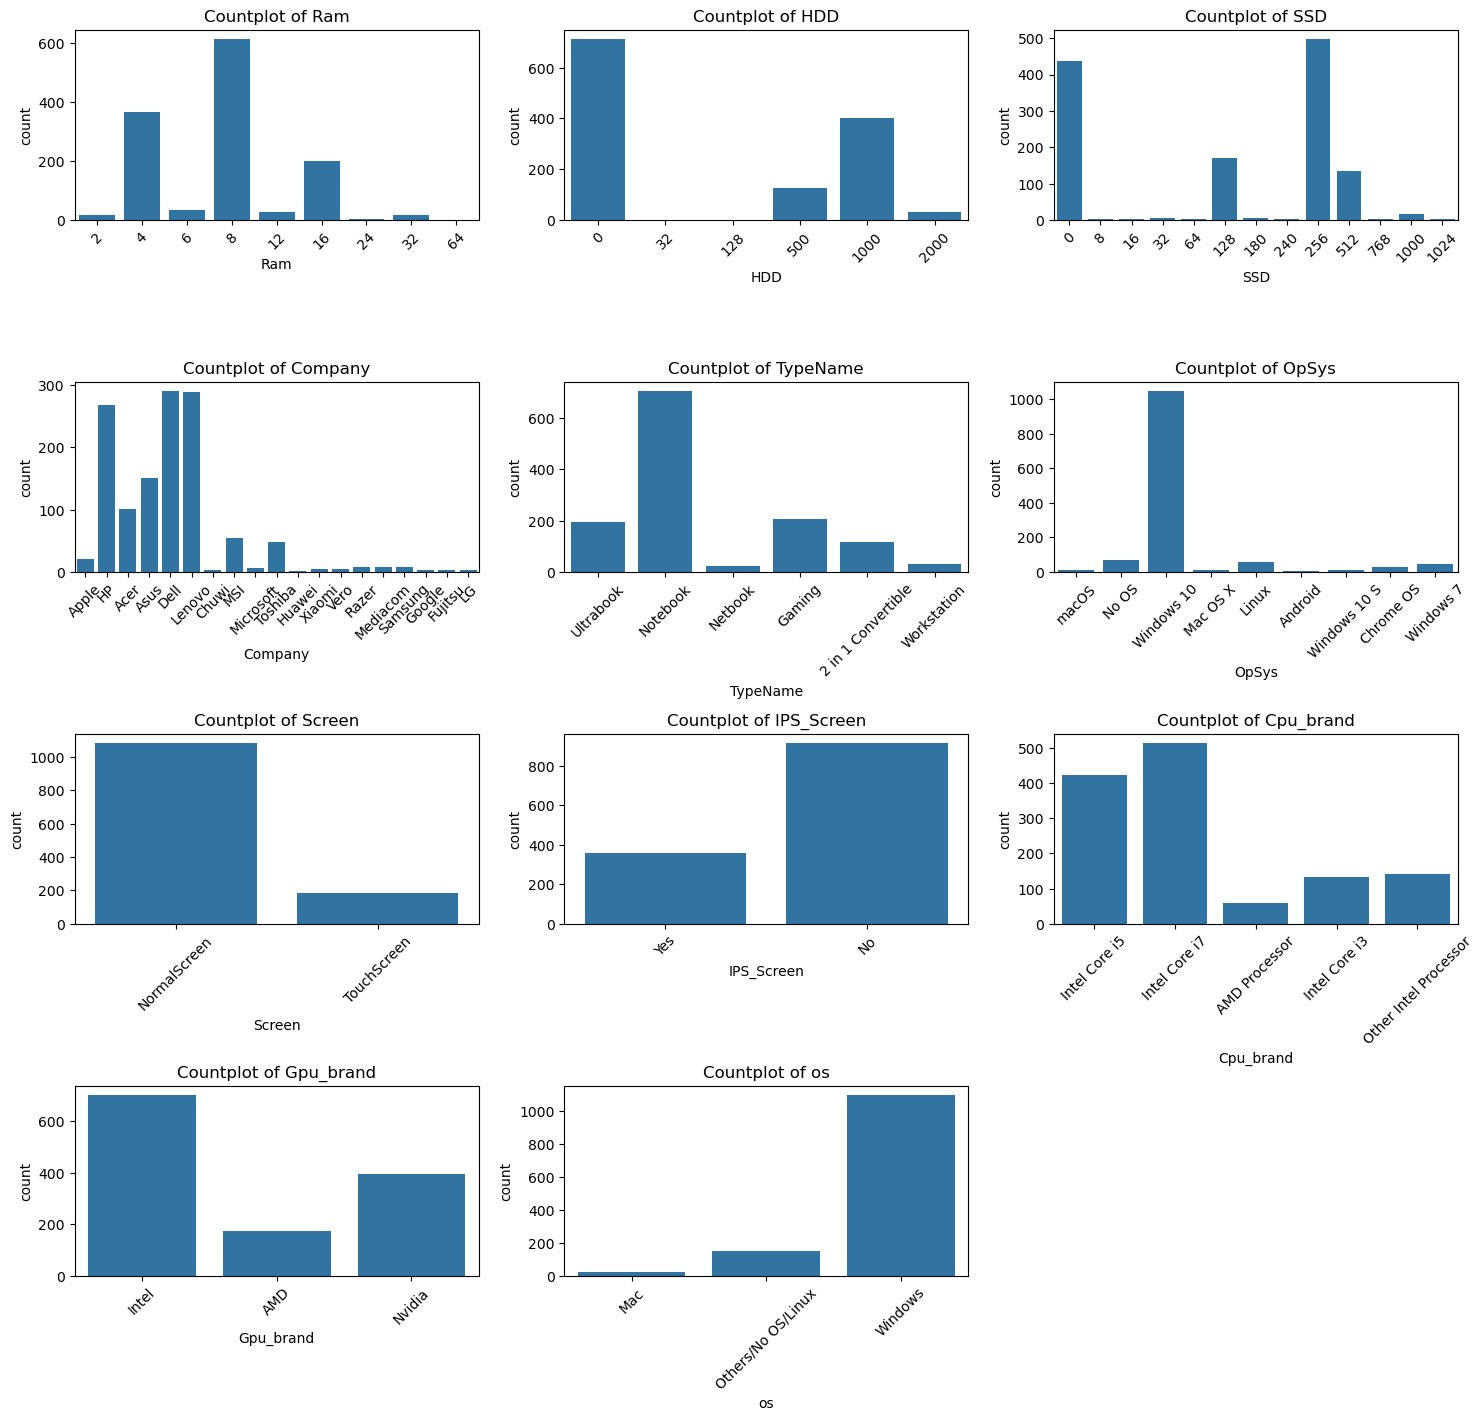

In [158]:
#Đếm số mẫu giữa các biến của các categorical features

#Danh sách các biến thật sự là biến phân loại (chỉ tính các biến cân nhắc có mối tương quan với target)
categorical_features = ['Ram', 'HDD', 'SSD', 'Company', 'TypeName', 'OpSys', 'Screen', 'IPS_Screen', 'Cpu_brand', 'Gpu_brand', 'os']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=data[feature])
    plt.title(f"Countplot of {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mối tương quan giữa các biến

### Biến liên tục (feature) với biến liên tục (target)

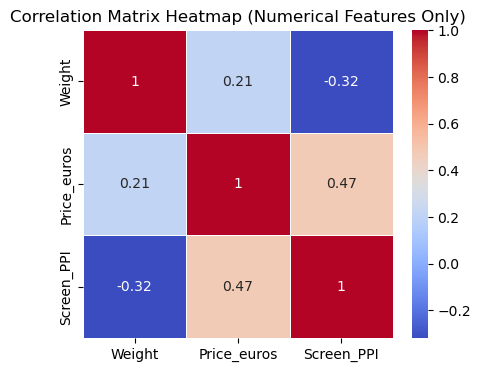

In [161]:
#Mối tương quan giữa các feature numerical
correlation_matrix = data[numerical_features].corr()

#Visualize correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features Only)")
plt.show()

<Figure size 300x300 with 0 Axes>

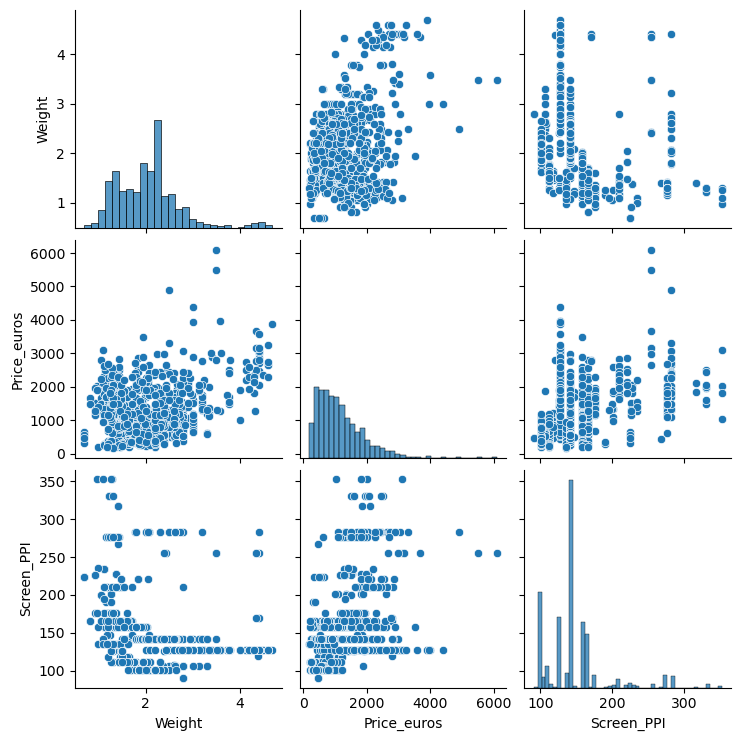

In [162]:
# Plotting pair plots to examine relationships between continuous variables
plt.figure(figsize=(3, 3))
sns.pairplot(data[numerical_features])
plt.show()

### Biến phân loại (feature) với biến liên tục (target)

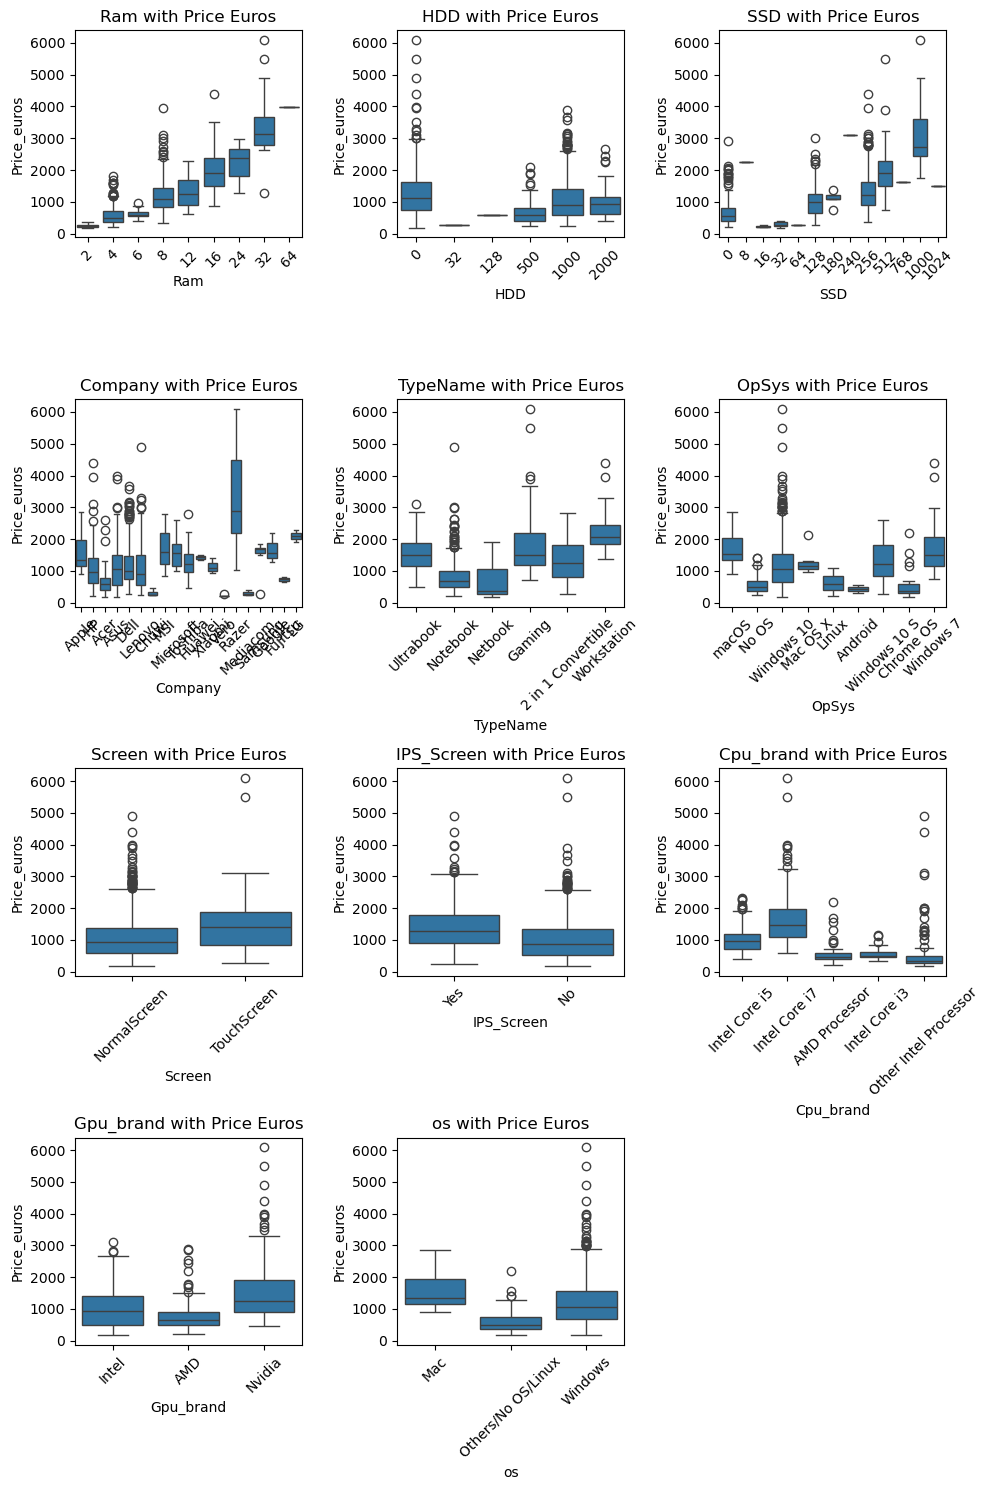

In [164]:
#Mối tương quan giữa các feature categorical với numerical
plt.figure(figsize=(10, 15))
for i, variable in enumerate(categorical_features[:12]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y='Price_euros', x=variable, data= data)
    plt.title(f"{variable} with Price Euros")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights

**I. Tổng quát**
1. Dữ liệu bị trùng 29 dòng, vì đây là dữ liệu về giá và không có yếu tố thời gian nên xử lý xóa các dòng bị trùng.
2. Dữ liệu không bị missing.
3. Dữ liệu cột Price_euros (target) có phân phối lệch trái mạnh và tỉ lệ outliers là 2.20%. Giá laptop thấp nhất là 174 euro và giá cao nhất lên tới 6099 euro, trong khi đó trung bình giá chỉ khoảng 1135 euro. Các laptop giá cao vượt trội hơn nên được chia sang một phân khúc khác để phân tích và không đưa vào model để tránh gây nhiễu.
4. Các cột biến liên tục có outliers tương đối cao và phân phối không chuẩn: Weight (3.53%), Screen_PPI (8.88%).

**II. Đánh giá từng feature:**
- Company: Có sự phân biệt rõ ràng trong giá laptop giữa những công ty khác nhau.
- TypeName: Tương tự với Company, có sự chênh lệch giá rõ ràng giữa giá laptop của các dòng máy khác nhau, trong đó dòng máy gaming và workstation có giá cao hơn hẳn.
- Ram: Dễ hiểu khi ram càng lớn thì giá laptop càng cao
- OpSys: Giá laptop cũng bị phụ thuộc bởi hệ điều hành, khi các hệ điều hành của MacOS và Window chiếm ưu thế hơn so với Android và No OS
- Weight: Nhìn vào heatmap có thể thấy máy càng nhẹ thì giá càng cao.
- Screen: Màn hình cảm ứng có giá cao hơn hẳn so với màn hình thường.
- IPS_Screen: Màn hình không có công nghệ IPS thì giá sẽ khiêm tốn hơn.
- Screen_PPI: Tương tự cân nặng, laptop có độ phân giải càng cao thì giá càng cao.
- Cpu_brand: Cấu hình cũng tác động mạnh tới giá laptop, khi máy CPU corei7 có giá cao hơn hẳn với các cấu hình còn lại.
- HDD, SSD: Boxplot cho thấy card màn hình cũng tác động đến giá laptop những sẽ tùy vào card chứ không có mối tương quan tịnh tiến rằng card càng nhiều gb thì giá càng cao.
- Gpu_brand: Thương hiệu GPU của laptop cũng ảnh hưởng đến giá, có thể thấy GPU của Ndivia có giá trị cao nhất.
- (!) os: cùng là hệ điều hành nhưng cột "OpSys" cung cấp nhiều thông tin chi tiết hơn và có thể giúp mô hình phân biệt rõ ràng hơn giữa các nhóm nên nó có thể là lựa chọn tốt hơn cột 'os'.


# Lưu lại dữ liệu sau khi EDA

In [170]:
data.to_csv('EDA_laptop_price_clean.csv')